In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
data1 = pd.read_excel("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/excess green index.xlsx")
data1

,Day,Date,EXG
0,0 2019,2019-03-26,-0.0120
1,13,2019-04-07,-0.0078
2,25,2019-04-19,-0.0067
3,35,2019-04-29,0.0250
4,41,2019-05-05,0.0675
5,49,2019-05-13,0.1000
6,55,2019-05-19,0.1200
7,62,2019-05-26,0.1580
8,69,2019-06-02,0.1800
9,77,2019-06-10,0.2000


In [90]:
data1 = data1.iloc[15:30]

In [91]:
data2 = data1.drop(['Day'], axis=1)
data2

,Date,EXG
15,2020-03-26,-0.0150
16,2020-04-07,-0.0100
17,2020-04-19,0.0012
18,2020-04-29,0.0300
19,2020-05-05,0.0400
20,2020-05-13,0.0520
21,2020-05-19,0.0810
22,2020-05-26,0.0950
23,2020-06-02,0.1100
24,2020-06-10,0.1740


In [92]:
data0 = data2.copy()
data0['Date'] = pd.to_datetime(data0['Date'])
data0.index = data0['Date']
del data0['Date']

In [93]:
df_interpol = data0.resample('D').mean()
df_interpol['EXG'] = df_interpol['EXG'].interpolate()
df_interpol

,EXG
Date,
2020-03-26,-0.015000
2020-03-27,-0.014583
2020-03-28,-0.014167
2020-03-29,-0.013750
2020-03-30,-0.013333
...,...
2020-07-15,0.208000
2020-07-16,0.206000
2020-07-17,0.204000


In [94]:
df_interpol.to_csv('EXG_2020.csv')

In [95]:
f4 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/EXG_2020.csv")

In [96]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [97]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [98]:
f4

,Date,EXG
0,2020-03-26,-0.015000
1,2020-03-27,-0.014583
2,2020-03-28,-0.014167
3,2020-03-29,-0.013750
4,2020-03-30,-0.013333
...,...,...
111,2020-07-15,0.208000
112,2020-07-16,0.206000
113,2020-07-17,0.204000
114,2020-07-18,0.202000


In [99]:
data2 = f4.copy()

In [100]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [101]:
data2.drop(['Date'], axis = 1,inplace = True)

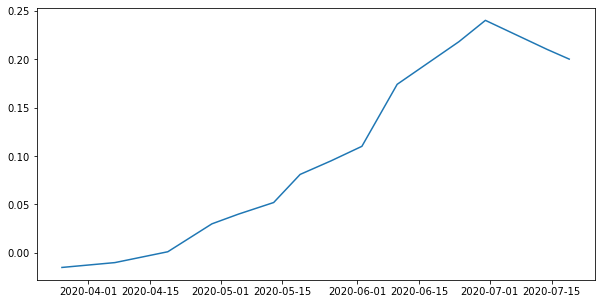

In [102]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['EXG'])

In [103]:
ad_fuller_result = adfuller(data2['EXG'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.4389724806116957
p-value: 0.5634562784154424


In [104]:
data2['EXG'] = np.log(data2['EXG'])
data2['EXG_log_diff'] = data2['EXG'] - data2['EXG'].shift(1)
data2 = data2.dropna()
ad_fuller_result = adfuller(data2['EXG_log_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -16.482914546246818
p-value: 2.2285757744258891e-29


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


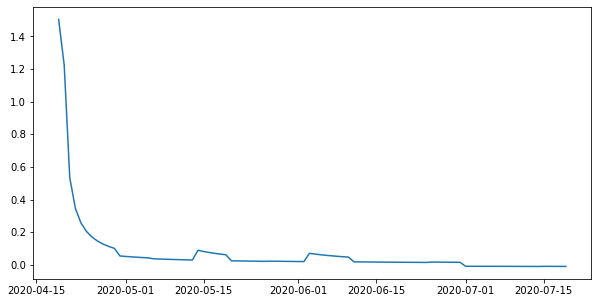

In [105]:
plt.plot(data2['EXG_log_diff'])

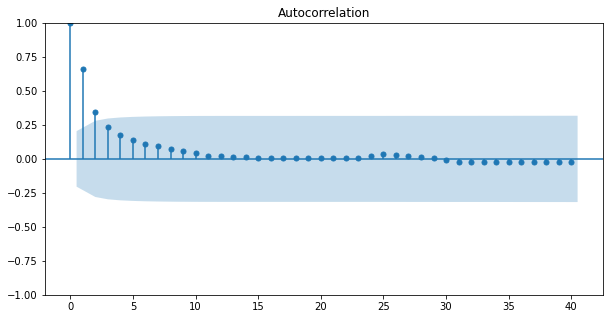

In [106]:
sm.graphics.tsa.plot_acf(data2['EXG_log_diff'].values.squeeze(), lags=40)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


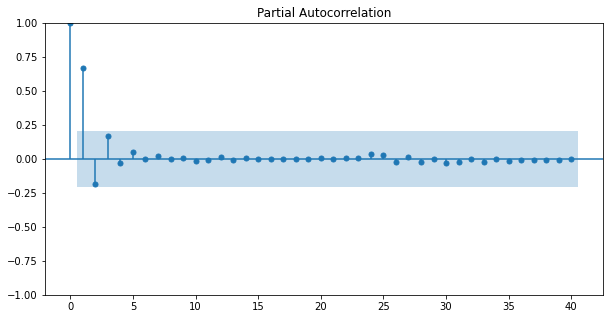

In [107]:
sm.graphics.tsa.plot_pacf(data2['EXG_log_diff'].values.squeeze(), lags=40)
plt.show()

In [108]:
# p can be 1
# q value can be 1 or 0
# D value is 1
# It is an AR process

In [109]:
train_data = data2[:50]
train_data_1 = train_data['EXG']
train_data_1

Date
2020-04-19   -6.725434
2020-04-20   -5.501658
2020-04-21   -4.967576
2020-04-22   -4.621300
2020-04-23   -4.364580
2020-04-24   -4.160484
2020-04-25   -3.991066
2020-04-26   -3.846235
2020-04-27   -3.719751
2020-04-28   -3.607484
2020-04-29   -3.506558
2020-04-30   -3.452491
2020-05-01   -3.401197
2020-05-02   -3.352407
2020-05-03   -3.305887
2020-05-04   -3.261435
2020-05-05   -3.218876
2020-05-06   -3.182062
2020-05-07   -3.146555
2020-05-08   -3.112266
2020-05-09   -3.079114
2020-05-10   -3.047026
2020-05-11   -3.015935
2020-05-12   -2.985782
2020-05-13   -2.956512
2020-05-14   -2.867632
2020-05-15   -2.786012
2020-05-16   -2.710553
2020-05-17   -2.640392
2020-05-18   -2.574831
2020-05-19   -2.513306
2020-05-20   -2.488915
2020-05-21   -2.465104
2020-05-22   -2.441847
2020-05-23   -2.419119
2020-05-24   -2.396896
2020-05-25   -2.375156
2020-05-26   -2.353878
2020-05-27   -2.331573
2020-05-28   -2.309754
2020-05-29   -2.288400
2020-05-30   -2.267494
2020-05-31   -2.247015
2020-0

In [110]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (1,1,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [111]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    EXG   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  38.786
Date:                Wed, 03 Aug 2022   AIC                            -73.572
Time:                        13:25:55   BIC                            -69.789
Sample:                    04-19-2020   HQIC                           -72.137
                         - 06-07-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9888      0.011     92.369      0.000       0.968       1.010
sigma2         0.0111      0.001     16.353      0.000       0.010       0.012
Ljung-Box (L1) (Q):                   0.00   Jarque-

<AxesSubplot:xlabel='Date'>

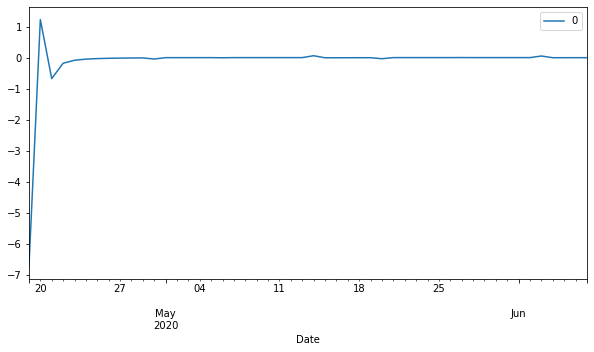

In [112]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

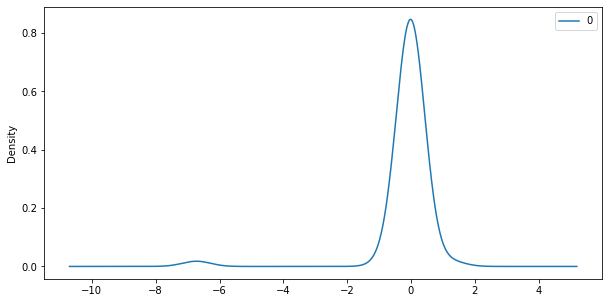

In [113]:
residuals.plot(kind='kde')

In [114]:
residuals.describe()

,0
count,50.000000
mean,-0.132339
std,0.972741
min,-6.725434
25%,-0.006011
50%,-0.001633
75%,-0.000254
max,1.223779


In [115]:
test_data = data2[50:60]
test_data_1 = test_data['EXG']
test_data_1

Date
2020-06-08   -1.845160
2020-06-09   -1.795767
2020-06-10   -1.748700
2020-06-11   -1.730799
2020-06-12   -1.713212
2020-06-13   -1.695930
2020-06-14   -1.678941
2020-06-15   -1.662236
2020-06-16   -1.645806
2020-06-17   -1.629641
Name: EXG, dtype: float64

In [116]:
model_pred = model_fit.forecast(steps = 10)
model_pred_1 = np.exp(model_pred)
model_pred_1

2020-06-08    0.158353
2020-06-09    0.167070
2020-06-10    0.176160
2020-06-11    0.185634
2020-06-12    0.195502
2020-06-13    0.205775
2020-06-14    0.216464
2020-06-15    0.227578
2020-06-16    0.239128
2020-06-17    0.251124
Freq: D, Name: predicted_mean, dtype: float64

In [117]:
test_data_2 = np.exp(test_data_1)
test_data_2

Date
2020-06-08    0.158000
2020-06-09    0.166000
2020-06-10    0.174000
2020-06-11    0.177143
2020-06-12    0.180286
2020-06-13    0.183429
2020-06-14    0.186571
2020-06-15    0.189714
2020-06-16    0.192857
2020-06-17    0.196000
Name: EXG, dtype: float64

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data_2, model_pred_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.029
